In [1]:
#import necessary libraries and functions
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#Load dataset
crops = pd.read_csv('input/Crop_recommendation.csv')

print(crops)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [3]:
X=crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # input values
Y=crops['label']  # output
print(crops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [4]:
#list for accuracies
estimator_accuracies = []
# Split dataset into training set and test set
test_train_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio)
#test fabdin firest classifier with different amount of estimators (1-20)
for n in range(1, 21):
    print("\nNumber of estimators = {}".format(n))
    #Create a Gaussian Classifier with n estimators
    clf=RandomForestClassifier(n_estimators=n, random_state=0)
    #Train the model using the training sets
    clf.fit(X_train,y_train)
    #predict outputs using testing data
    y_pred=clf.predict(X_test)
    print("-> Accuracy:",metrics.accuracy_score(y_test, y_pred))
    estimator_accuracies.append(metrics.accuracy_score(y_test, y_pred))


Number of estimators = 1
-> Accuracy: 0.96

Number of estimators = 2
-> Accuracy: 0.9672727272727273

Number of estimators = 3
-> Accuracy: 0.9818181818181818

Number of estimators = 4
-> Accuracy: 0.9927272727272727

Number of estimators = 5
-> Accuracy: 0.9945454545454545

Number of estimators = 6
-> Accuracy: 0.9945454545454545

Number of estimators = 7
-> Accuracy: 0.990909090909091

Number of estimators = 8
-> Accuracy: 0.9945454545454545

Number of estimators = 9
-> Accuracy: 0.9945454545454545

Number of estimators = 10
-> Accuracy: 0.9945454545454545

Number of estimators = 11
-> Accuracy: 0.9945454545454545

Number of estimators = 12
-> Accuracy: 0.9945454545454545

Number of estimators = 13
-> Accuracy: 0.9945454545454545

Number of estimators = 14
-> Accuracy: 0.9945454545454545

Number of estimators = 15
-> Accuracy: 0.9927272727272727

Number of estimators = 16
-> Accuracy: 0.9927272727272727

Number of estimators = 17
-> Accuracy: 0.9927272727272727

Number of estimators

In [5]:
#list for accuracies
accuracies = []
#test random forest with five different test/train data ratios
for i in range(1,5):
    #calculate ratio
    test_train_ratio = float((100 - 10*i) / 100)
    print("\nTest data: {}%".format(100 * test_train_ratio))
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio)

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=20, random_state=0)

    #Train the model using the training sets
    clf.fit(X_train,y_train)

    #predict outputs using testing data
    y_pred=clf.predict(X_test)
    print("-> Accuracy:",metrics.accuracy_score(y_test, y_pred))
    accuracies.append(metrics.accuracy_score(y_test, y_pred))



Test data: 90.0%
-> Accuracy: 0.9525252525252526

Test data: 80.0%
-> Accuracy: 0.9869318181818182

Test data: 70.0%
-> Accuracy: 0.9883116883116884

Test data: 60.0%
-> Accuracy: 0.9871212121212121


In [6]:
# calculate, how many times output was predicted correctly with testing data
for i in range(1,5):
    test_train_ratio = float((100 - 10*i) / 100)
    print("Test data: {}%, accuracy: {}".format(100 * test_train_ratio, accuracies[i-1]))
print(classification_report(y_test,y_pred))

Test data: 90.0%, accuracy: 0.9525252525252526
Test data: 80.0%, accuracy: 0.9869318181818182
Test data: 70.0%, accuracy: 0.9883116883116884
Test data: 60.0%, accuracy: 0.9871212121212121
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        67
      banana       1.00      1.00      1.00        66
   blackgram       0.98      0.98      0.98        64
    chickpea       1.00      1.00      1.00        58
     coconut       1.00      1.00      1.00        61
      coffee       1.00      0.98      0.99        60
      cotton       1.00      1.00      1.00        56
      grapes       1.00      1.00      1.00        54
        jute       0.96      0.96      0.96        55
 kidneybeans       1.00      1.00      1.00        64
      lentil       0.95      1.00      0.97        56
       maize       0.96      1.00      0.98        54
       mango       1.00      0.88      0.93        57
   mothbeans       0.89      0.94      0.91        62
 

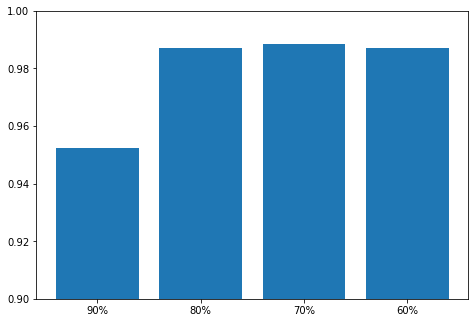

In [7]:
#display accuracies
fig = plt.figure()
plt.title('Accuracies')
ax = fig.add_axes([0,0,1,1])
ratios = ['90%', '80%', '70%', '60%']
ax.bar(ratios,accuracies)
ax.set_ylim([0.9, 1.0])
plt.show()

In [8]:
#save final data to csv file
df = pd.DataFrame({'ratio': [],
                         'accuracy': []
                        })
for i in range(4):
    df.loc[len(df.index)] = [ratios[i], accuracies[i]]
    
print(df)

df.to_csv('input/rfc_accuracies.csv', index=False)

  ratio  accuracy
0   90%  0.952525
1   80%  0.986932
2   70%  0.988312
3   60%  0.987121
